In [18]:

#Predicting Stock Prices Using Regression Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [19]:

df = pd.read_csv('dataset.csv')
df.head()

symbol                       date   close    high       low    open  \
0   GOOG  2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48   
1   GOOG  2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00   
2   GOOG  2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91   
3   GOOG  2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65   
4   GOOG  2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77   

    volume  adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  \
0  1306065    718.27   722.47  713.1200   716.48    1306065      0.0   
1  1214517    718.92   722.98  717.3100   719.00    1214517      0.0   
2  1982471    710.36   716.65  703.2600   714.91    1982471      0.0   
3  3402357    691.72   708.82  688.4515   708.65    3402357      0.0   
4  2082538    693.71   702.48  693.4100   698.77    2082538      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

In [20]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [21]:
df.head()

symbol        date   close    high       low    open   volume  adjClose  \
0   GOOG  2016-06-14  718.27  722.47  713.1200  716.48  1306065    718.27   
1   GOOG  2016-06-15  718.92  722.98  717.3100  719.00  1214517    718.92   
2   GOOG  2016-06-16  710.36  716.65  703.2600  714.91  1982471    710.36   
3   GOOG  2016-06-17  691.72  708.82  688.4515  708.65  3402357    691.72   
4   GOOG  2016-06-20  693.71  702.48  693.4100  698.77  2082538    693.71   

   adjHigh    adjLow  adjOpen  adjVolume  divCash  splitFactor  
0   722.47  713.1200   716.48    1306065      0.0          1.0  
1   722.98  717.3100   719.00    1214517      0.0          1.0  
2   716.65  703.2600   714.91    1982471      0.0          1.0  
3   708.82  688.4515   708.65    3402357      0.0          1.0  
4   702.48  693.4100   698.77    2082538      0.0          1.0

In [22]:

df.shape


(1258, 14)

In [23]:
# Dropping the variables we do not need. 

df = df.drop(columns=[
      'symbol', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'
],axis = 1) 
df.head()


date   close    high       low    open   volume
0  2016-06-14  718.27  722.47  713.1200  716.48  1306065
1  2016-06-15  718.92  722.98  717.3100  719.00  1214517
2  2016-06-16  710.36  716.65  703.2600  714.91  1982471
3  2016-06-17  691.72  708.82  688.4515  708.65  3402357
4  2016-06-20  693.71  702.48  693.4100  698.77  2082538

In [24]:
#CHECKING DUPLICATES

df.duplicated().sum().any()

np.False_

In [25]:
# Checking for True or False for any nulls in the dataset  

df.isnull().values.any()

np.False_

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   close   1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   open    1258 non-null   float64
 5   volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [26]:

df.describe()

close         high          low         open        volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean   1216.317067  1227.430934  1204.176430  1215.260779  1.601590e+06
std     383.333358   387.570872   378.777094   382.446995  6.960172e+05
min     668.260000   672.300000   663.284000   671.000000  3.467530e+05
25%     960.802500   968.757500   952.182500   959.005000  1.173522e+06
50%    1132.460000  1143.935000  1117.915000  1131.150000  1.412588e+06
75%    1360.595000  1374.345000  1348.557500  1361.075000  1.812156e+06
max    2521.600000  2526.990000  2498.290000  2524.920000  6.207027e+06

In [ ]:
df['date_numeric'] = pd.to_datetime(df['date']).map(pd.Timestamp.toordinal)


numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.corr())


                 close      high       low      open    volume  date_numeric
close         1.000000  0.999528  0.999586  0.999083 -0.025574      0.888735
high          0.999528  1.000000  0.999354  0.999575 -0.012470      0.891449
low           0.999586  0.999354  1.000000  0.999499 -0.035184      0.885920
open          0.999083  0.999575  0.999499  1.000000 -0.021381      0.888582
volume       -0.025574 -0.012470 -0.035184 -0.021381  1.000000      0.065761
date_numeric  0.888735  0.891449  0.885920  0.888582  0.065761      1.000000


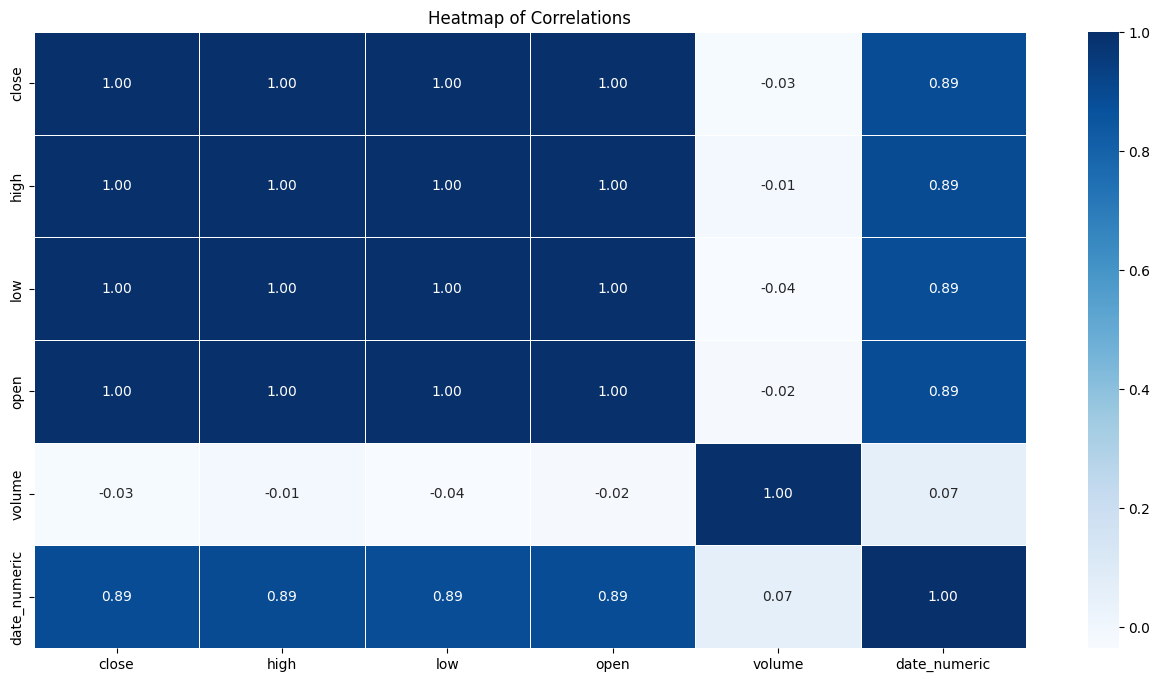

In [33]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, cmap="Blues", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()

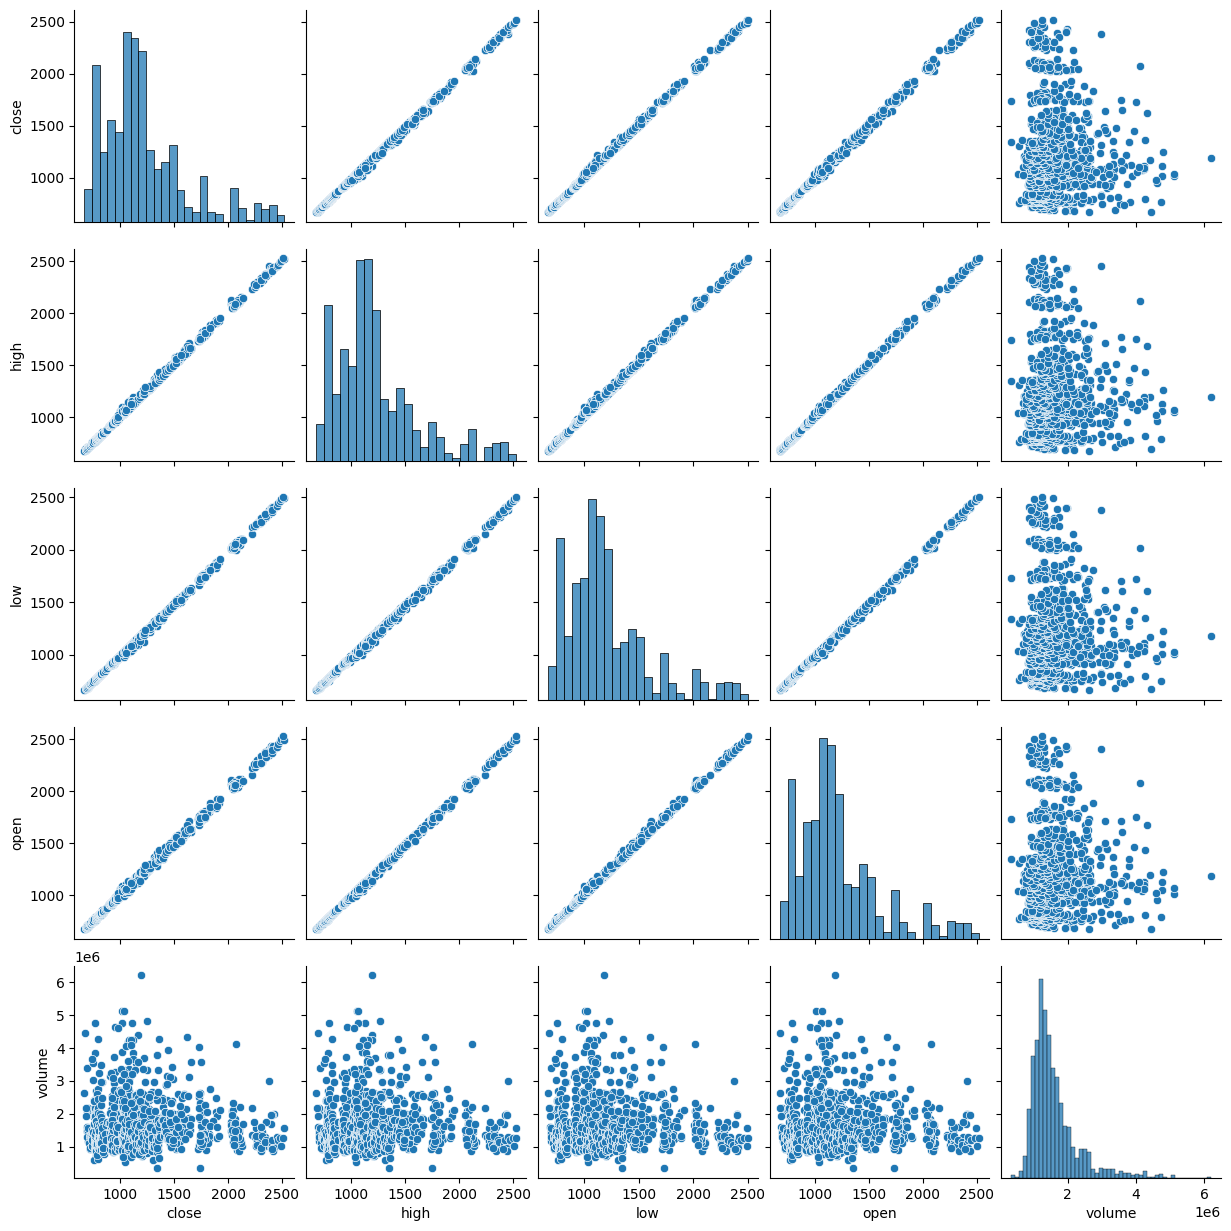

In [30]:
# Visualization overview of relationships in the dataset
# Showing visualizations on all variables in the data
sns.pairplot(df)

<Axes: >

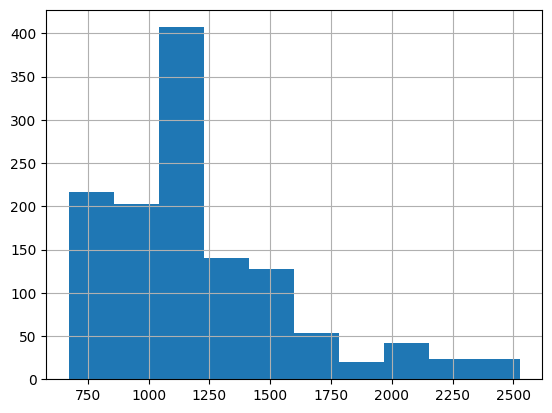

In [34]:
# Histogram visualization for each variable. 
df['open'].hist()

<Axes: >

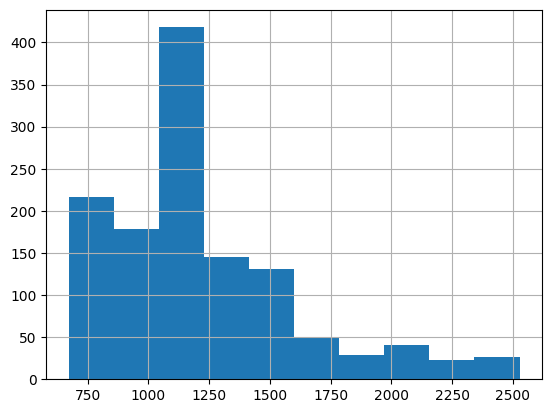

In [35]:
df['high'].hist()

<Axes: >

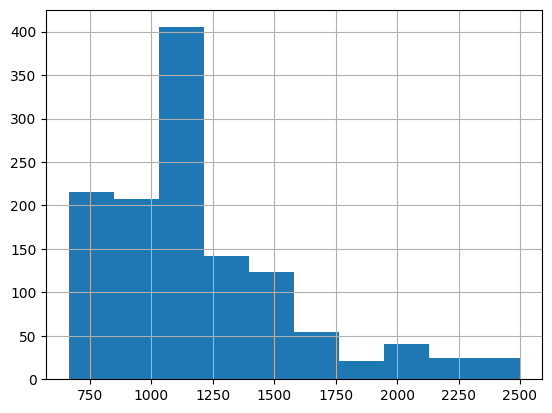

In [36]:
df['low'].hist()

<Axes: >

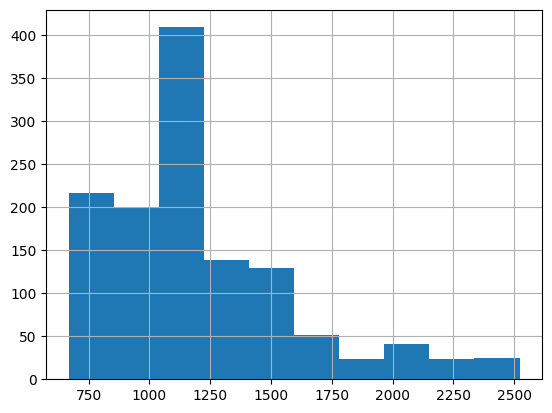

In [37]:
df['close'].hist()

<Axes: >

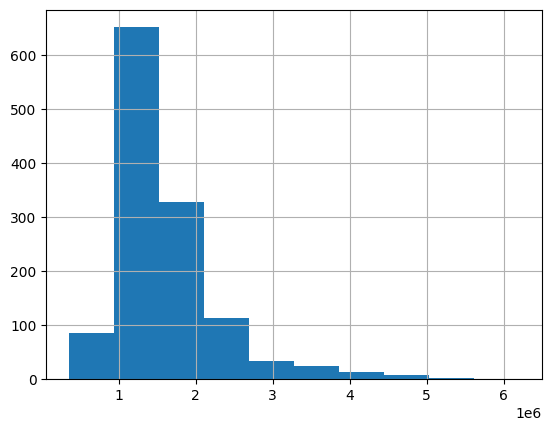

In [38]:
df['volume'].hist()

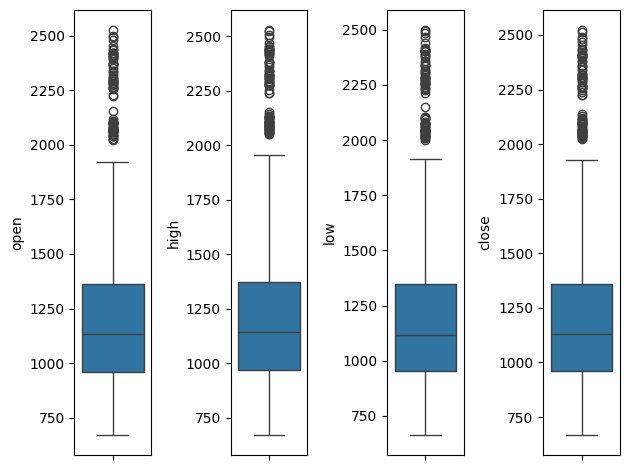

In [39]:
# Review box plots 
f, axes = plt.subplots(1,4)
sns.boxplot( y='open', data=df, ax=axes[0])
sns.boxplot( y='high', data=df, ax=axes[1])
sns.boxplot( y='low', data=df, ax=axes[2])
sns.boxplot( y='close', data=df, ax=axes[3])
plt.tight_layout()

In [43]:
# Splitting the dataset 
 
X = df[['open', 'high', 'low', 'volume']].values # independant variables
y = df['close'].values # dependent variable


In [44]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:

# checking the shape for train data
print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (1006, 4)
Test: (252, 4)


In [46]:
# Training the Model Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm


In [47]:

regressor = LinearRegression()

model = regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [48]:

predicted = regressor.predict(X_test)

In [49]:
# X_test shape
predicted.shape

(252,)

In [50]:
#Validating the fit
# Printout relevant metrics
print("Model Coefficients:", regressor.coef_)
#looking at the intercept
print("Model intercept:", regressor.intercept_)

Model Coefficients: [-5.54784375e-01  7.77461854e-01  7.76833889e-01 -4.55059829e-07]
Model intercept: 1.4776059634698413


In [51]:
#Prediction table of actual prices vs predicted values
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted}) 
print(dfr)

     Actual_Price  Predicted_Price
0          695.94       697.302933
1         1084.99      1090.146792
2          769.54       772.628263
3         1349.33      1345.790934
4          843.25       841.900950
..            ...              ...
247       1567.24      1577.560900
248        745.91       741.785159
249       1175.84      1162.560630
250        762.49       766.104077
251       1036.23      1032.660476

[252 rows x 2 columns]


In [52]:
#Stats on actual price & predicted price
dfr.describe()

Actual_Price  Predicted_Price
count     252.00000       252.000000
mean     1239.92381      1239.673289
std       378.69218       379.364626
min       675.22000       675.546297
25%      1028.45250      1021.774677
50%      1163.42500      1158.541487
75%      1428.65000      1429.116931
max      2411.56000      2419.701570

In [54]:
#checking p-value with right tailed or upper tailed test
# Importing scipy library
import scipy.stats


In [55]:
# finding p-value
p_value = scipy.stats.norm.sf(abs(1.67))
print('p value is : ' + str(p_value))

p value is : 0.04745968180294733


In [57]:
#checking the regression score
from sklearn.metrics import confusion_matrix, accuracy_score
 
regression_confidence = regressor.score(X_test,y_test)
print("Linear regression confidence: ", regression_confidence )

Linear regression confidence:  0.9996411863249157


In [58]:
#Evalutating the model - the closer to zero for all these metrics the better. 
import math
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 5.170018962750284
Mean Squared Error: 51.2524748066784
Root Mean Squared Error: 7.159083377547604


In [59]:
#Model Accuracy
x2 = abs(predicted - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 99.59 %.


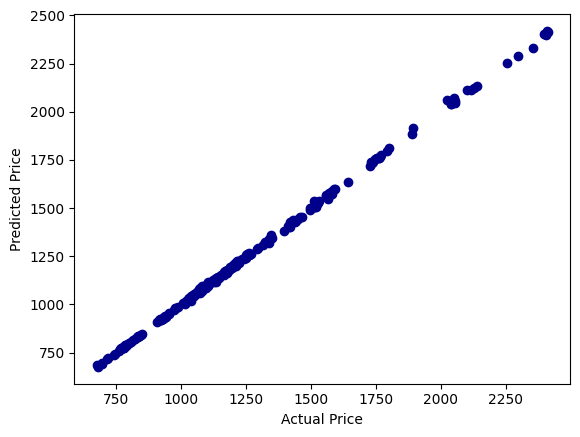

In [60]:
#Plot
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

<Axes: >

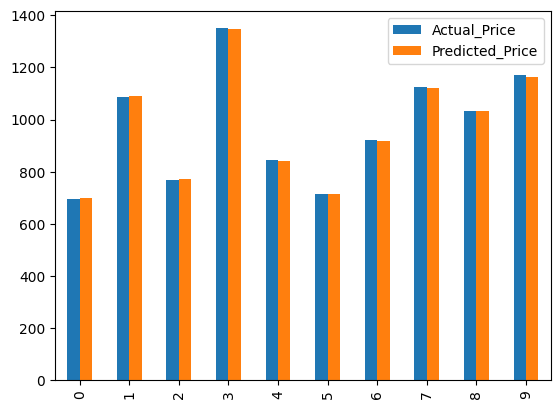

In [61]:
 #Graph the first 10 values
# graph first 10 values
graph = dfr.head(10)
graph.plot(kind='bar')